In [14]:
import numpy as np

y = np.arange(1, 5, 0.1)
x = y**2

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(40, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('tanh'))
model.add(Dense(50))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('relu'))

In [16]:
sgd = SGD(lr=0.01, decay=0.0000001, momentum=0.7)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [17]:
training = model.fit(x, y, epochs=5000, batch_size=40, verbose=0)
print(training.history['loss'][-1])

2.1232024664641358e-05


In [18]:
t = model.predict(x, verbose=1)

2/2 [==============================] - 0s 613us/step


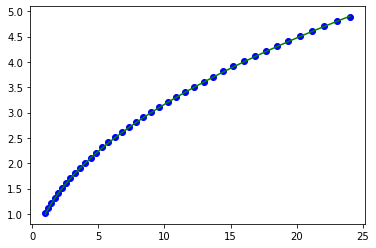

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y, color='g')
plt.scatter(x, t+0.01, color='b')
plt.show()

In [20]:

import numpy as np
import random

x = np.arange(1, 5, 0.05)
E = np.zeros((len(x), 3), dtype='float32')

err = 0.2
yt = np.sin(x)

y = yt+2*err*np.random.rand(len(x))-err


n = y.shape[0]

train_rank = int(0.8*n)
test_rank = int(0.2*n)

train_subset = np.random.choice(x.shape[0], train_rank)
test_subset = np.random.choice(x.shape[0], test_rank)


train_x = x[train_subset]
train_y = y[train_subset]

# test dataset
test_x = x[test_subset]
test_y = y[test_subset]


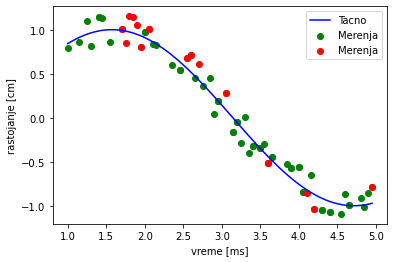

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(train_x, train_y, color='g', label='Merenja')
plt.scatter(test_x, test_y, color='r', label='Merenja')

plt.plot(x, yt, color='b', label='Tacno')
plt.xlabel('vreme [ms]')
plt.ylabel('rastojanje [cm]')
plt.legend();

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(40, input_dim=1))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('tanh'))
model.add(Dense(50))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('tanh'))

In [23]:
sgd = SGD(lr=0.01, decay=0.0000001, momentum=0.7)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])


In [24]:
training = model.fit(x, y, epochs=100, batch_size=40, verbose=0, validation_split=0.3)
print(training.history['loss'][-1])



0.020415181294083595


In [25]:
t = model.predict(test_x, verbose=1)

1/1 [==============================] - 0s 566us/step


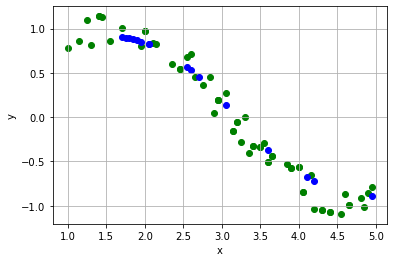

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.grid()
plt.ylabel('y')
plt.xlabel('x')
plt.scatter(train_x, train_y, color='g')
plt.scatter(test_x, t, color='b')
plt.show()